<a href="https://colab.research.google.com/github/amolprabhu/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Dictionary
Demographic:

• Sex: male or female("M" or "F") 

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) 

Behavioral: 

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO") 

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) 

Medical( history): 

• BP Meds: whether or not the patient was on blood pressure medication (Nominal) 

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal) 

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal) 

• Diabetes: whether or not the patient had diabetes (Nominal) 

Medical(current):

• Tot Chol: total cholesterol level (Continuous) 

• Sys BP: systolic blood pressure (Continuous) 

• Dia BP: diastolic blood pressure (Continuous) 

• BMI: Body Mass Index (Continuous) 

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.) 

• Glucose: glucose level (Continuous) 

Predict variable (desired target):

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV



In [1]:
# Importing libraries necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the data
data = pd.read_csv('/content/drive/MyDrive/Cardiovascular Risk Prediciton/data_cardiovascular_risk.csv')

In [3]:
# Inspecting the first 5 rows of the data
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [4]:
# Information about various columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [5]:
# Statistical Description of the data
data.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


## Data Cleaning

In [6]:
# Checking for duplicates
data.duplicated().sum()

0

In [7]:
# Dropping the 'id' column
data.drop('id', axis = 1, inplace = True)

In [8]:
# Summing null values
data.isna().sum()[data.isna().sum() > 0]

education      87
cigsPerDay     22
BPMeds         44
totChol        38
BMI            14
heartRate       1
glucose       304
dtype: int64

### As we start with a limited set of rows of 3390, we must try to fill the null values strategically instead of dropping them.

### As 'education' and 'BPMeds' are categorical variables we will use mode to fill the null values

In [9]:
# Filling null values of education
data['education'].value_counts()

1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

In [10]:
# Understanding value counts of BP Meds
data['BPMeds'].value_counts()

0.0    3246
1.0     100
Name: BPMeds, dtype: int64

In [11]:
# Creating a function to fill null values of categorical columns with mode
def mode_fillna(df , columns):
  ''' Null values of categorical columns are filled with the mode of the column'''
  for column in columns:
    df[column] = df[column].fillna(df[column].mode()[0])

In [12]:
# Applying the function to fill null values of the column with mode
mode_fillna(df = data, columns = ['education','BPMeds'])

### As the columns 'cigsPerDay', 'totChol','BMI','heartRate' and 'glucose' are continous in nature and also these columns have outliers, median will be useful to fill the null values.

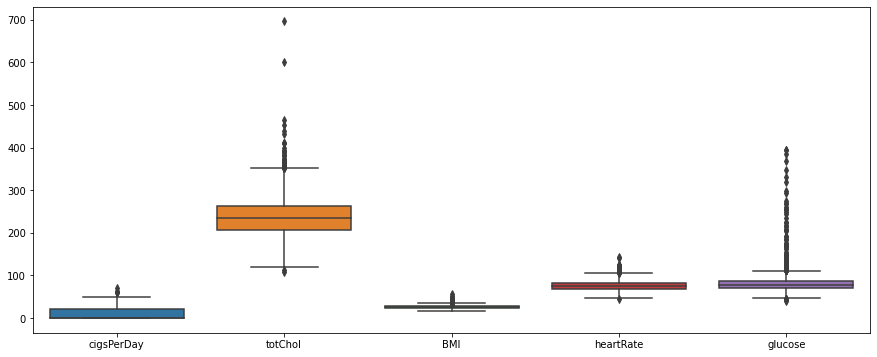

In [13]:
# Distribution of the continous columns with null values
plt.figure(figsize=(15,6))
sns.boxplot(data=data[['cigsPerDay','totChol','BMI','heartRate','glucose']])

In [14]:
# Creating a function to fill null values of continous columns with median
def median_fillna(df, columns):
  ''' Null values of continous columns are filled with the median of the column '''
  for column in columns:
    df[column] = df[column].fillna(df[column].median())

In [15]:
# Applying the function to fill null values of continous columns with the median
median_fillna(df = data, columns = ['cigsPerDay','totChol','BMI','heartRate','glucose'])

In [16]:
# Checking for null values after treating the null values
data.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [17]:
# Statistical Description of data after treating null values
data.describe(include = 'all')

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3390,3390,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.00000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.542183,1.946018,NaN,NaN,9.010619,0.029499,0.006490,0.315339,0.025664,237.039823,132.60118,82.883038,25.793251,75.976991,81.720059,0.150737
std,8.592878,1.017568,NaN,NaN,11.862839,0.169224,0.080309,0.464719,0.158153,44.994205,22.29203,12.023581,4.107026,11.970114,23.161265,0.357846
min,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.030000,68.000000,72.000000,0.000000
50%,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,27.997500,83.000000,85.000000,0.000000


In [18]:
# Information of data after treating null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


### All null values have been successfully filled strategically.

In [19]:
# No cigarettes smoked though the smoking column is yes
data.loc[(data['is_smoking'] == 'YES') & (data['cigsPerDay'] == 0)]

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
422,55,1.0,F,YES,0.0,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
466,45,3.0,M,YES,0.0,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
469,42,1.0,M,YES,0.0,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,78.0,0
491,61,1.0,F,YES,0.0,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
538,41,1.0,F,YES,0.0,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0
767,54,1.0,M,YES,0.0,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1461,47,2.0,F,YES,0.0,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0
1467,49,1.0,F,YES,0.0,0.0,0,0,0,252.0,123.0,69.0,21.45,72.0,89.0,0
1597,57,1.0,F,YES,0.0,0.0,0,0,0,229.0,115.0,69.0,24.43,80.0,93.0,0
1986,49,2.0,F,YES,0.0,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.0,0


### As seen above there are entries where the 'is_smoking' column says 'YES' but there are no cigarettes smoked.

In [20]:
# Value counts before correction
data['is_smoking'].value_counts()

NO     1703
YES    1687
Name: is_smoking, dtype: int64

In [21]:
# Correcting the 'is_smoking' column to 'NO' where there are no cigarettes smoked
data.loc[(data['is_smoking'] == 'YES') & (data['cigsPerDay'] == 0), 'is_smoking'] = 'NO'

In [22]:
# Values counts after correction
data['is_smoking'].value_counts()

NO     1725
YES    1665
Name: is_smoking, dtype: int64

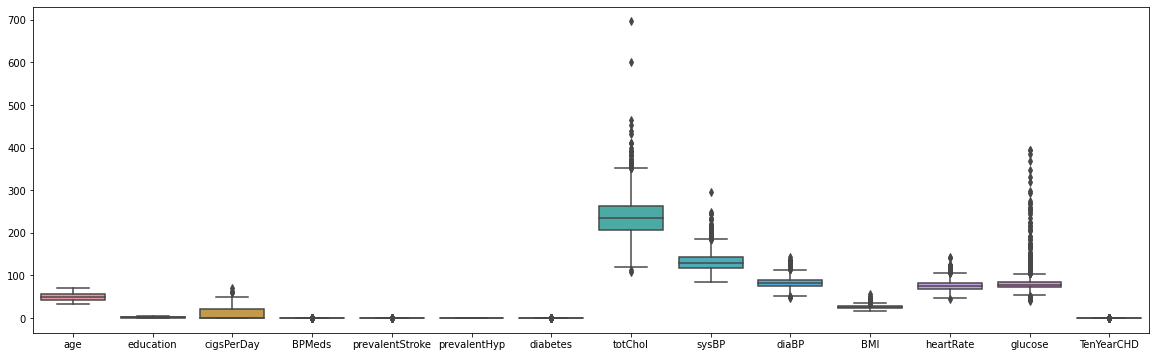

In [23]:
# Boxplot for all columns
plt.figure(figsize=(20,6))
sns.boxplot(data=data)

In [24]:
# Function which returns columns with risk of outlier removal
def outlier_cal(columns):
  ''' Returns a dataframe showing risk of removal of outliers'''
  outlier_df = pd.DataFrame(columns=['Column', 'Upper Limit', 'Lower Limit', 'Upper Removal', 'Lower Removal', '% of Risk'])
  
  for column in columns:
    q3 = data[column].quantile(0.75)
    q1 = data[column].quantile(0.25)
    iqr = q3 - q1
    ul = q3 + (1.5* iqr)
    ll = q1 - (1.5* iqr)
  
    upper_removal = dict(data[data[column] > ul]['TenYearCHD'].value_counts())
    lower_removal = dict(data[data[column] < ll]['TenYearCHD'].value_counts())

    input_dict = {'Column' : column,
                  'Upper Limit' : ul,
                  'Lower Limit' : ll,
                  'Upper Removal' : upper_removal,
                  'Lower Removal' : lower_removal,
                  '% of Risk' : upper_removal[1]*100/len(data[data[column] > ul])}

    outlier_df = outlier_df.append(input_dict, ignore_index = True)

  return outlier_df

In [25]:
# Applying the function created
outlier_cal(['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose'])

,Column,Upper Limit,Lower Limit,Upper Removal,Lower Removal,% of Risk
0,cigsPerDay,50.00000,-30.00000,"{0: 7, 1: 2}",{},22.222222
1,totChol,351.00000,119.00000,"{0: 30, 1: 11}","{1: 1, 0: 1}",26.829268
2,sysBP,184.50000,76.50000,"{0: 64, 1: 41}",{},39.047619
3,diaBP,113.25000,51.25000,"{0: 32, 1: 23}","{1: 2, 0: 1}",41.818182
4,BMI,35.44875,15.57875,"{0: 62, 1: 17}",{},21.518987
5,heartRate,105.50000,45.50000,"{0: 50, 1: 13}",{0: 1},20.634921
6,glucose,104.50000,52.50000,"{0: 143, 1: 57}","{0: 13, 1: 1}",28.500000
